<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/10%20RNN(%EC%8B%9C%EA%B3%84%EC%97%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1000, 1)
[[1.        ]
 [1.1936735 ]
 [1.36948492]
 [1.51997896]
 [1.63841708]]


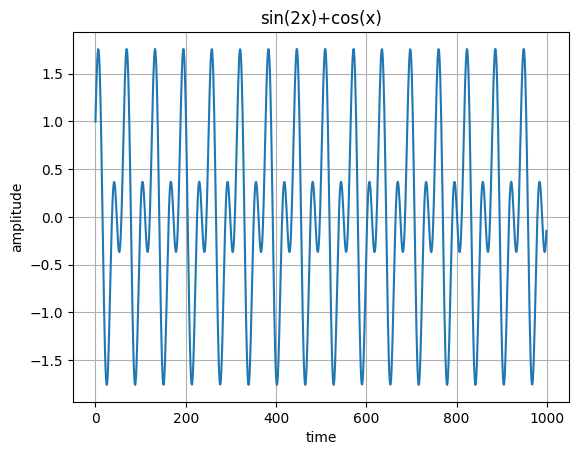

(980, 20, 1) (980, 1)
(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1495 - mae: 0.2574 - val_loss: 0.0048 - val_mae: 0.0601
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mae: 0.0454 - val_loss: 8.0877e-04 - val_mae: 0.0239
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.1228e-04 - mae: 0.0175 - val_loss: 1.5633e-04 - val_mae: 0.0111
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.9383e-05 - mae: 0.0073 - val_loss: 2.7126e-05 - val_mae: 0.0044
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.7045e-05 - mae: 0.0033 - val_loss: 8.3234e-06 - val_mae: 0.0024
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0174e-05 - mae: 0.0026 - val_loss: 5.6636e-06 - val_mae: 0.0020
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2409e-06 - mae: 0.0019 - val_loss: 5.9813e-06 - val_mae: 0.0020
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.2780e-06 - mae: 0.0021 - val_loss: 4.2782e-06 - val_mae: 0.0017
Epoch 9/10
25/25 ━━

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
(196, 1)
random idx =  [168  71  63 144 166] 

pred  =  [-1.3547767   0.09442419 -0.27464706  1.745442   -1.6262958 ]
label =  [-1.35187686  0.09286882 -0.27339677  1.74457474 -1.62753387]


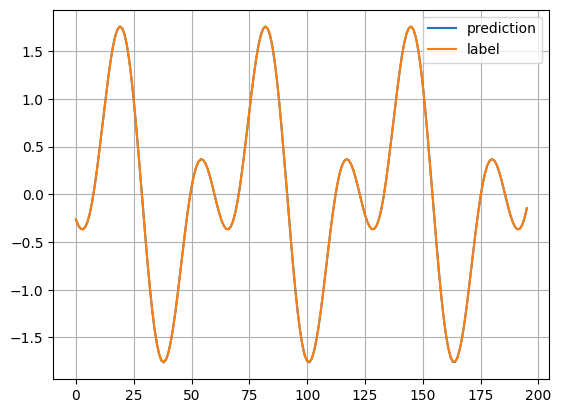

In [ ]:
#출처: https://blog.naver.com/hk428428/222538296276
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense
from tensorflow.keras import Sequential

# data 생성

x = np.arange(0, 100, 0.1)
y = np.sin(2*x) + np.cos(x)

seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

plt.grid()
plt.title('sin(2x)+cos(x)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

def seq2dataset(seq, window, horizon):

    X = []
    Y = []

    for i in range(len(seq)-(window+horizon)+1):

        x = seq[i:(i+window)]
        y = (seq[i+window+horizon-1])

        X.append(x)
        Y.append(y)

    return np.array(X), np.array(Y)

w = 20  # window size
h = 1  # horizon factor

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)


split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

tf.keras.backend.clear_session()
model = Sequential()
#model.add(SimpleRNN(units=128, activation='tanh',input_shape=x_train[0].shape))

model.add(SimpleRNN(units=128, activation='tanh',input_shape=(20,1)))

model.add(Dense(1))

model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#--------------------------------------------------
from datetime import datetime
start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

end_time = datetime.now()
print('Elapsed Time => ', end_time-start_time)
#--------------------------------------------------

pred = model.predict(x_test)

print(pred.shape) # 196개의 test data 얼마나 미래를 잘 예측하는지 보자!

rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx = ',rand_idx, '\n')

print('pred  = ', pred.flatten()[rand_idx]) # 예측값
print('label = ', y_test.flatten()[rand_idx]) # 정답값

#print(pred[rand_idx])
#print(y_test[rand_idx])

## 예측값과 정답이 거의 일치하여 하나의 그래프로 보임

plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 예제 데이터 생성
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 데이터 플롯팅
plt.plot(x, y)

# 그리드 추가
plt.grid()

# 그래프 보여주기
plt.show()